<a href="https://colab.research.google.com/github/Aditi-dev07/Cisco_DataScience_Projects/blob/main/Coding%20for%20Answer/Naming%20colors/naming-colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naming colors

If you are shown random colors evenly spaced across the color spectrum, what percentage of those colors would the average person name red? What about green?

English speakers in the United States were shown 80 color chips in random order in controlled lighting condtions. These 80 colors are evenly spaced across the standard Munsell array of colors. The participants were told: "There are 11 choices: black, white, red, green, blue, purple, brown, yellow, orange, pink, gray. Choose the closest color word".

This study was then repeated with Bolivian-Spanish speakers in Bolivia and Tsimane' speakers from the Amazon.

The dataset `munsell-array-fixed-choice.csv` shows the most common name in each language for each color chip.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'munsell-array-fixed-choice.csv'.

from google.colab import files
uploaded = files.upload()

Saving munsell-array-fixed-choice.csv to munsell-array-fixed-choice.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("munsell-array-fixed-choice.csv")
df.head()

,grid,x,y,munsell_code,tile_hex,english_color,spanish_color,tsimane_color,spanish,tsimane
0,B1,1,7,5R8/6,#fbb6b0,pink,pink,yellow,rosada (pink),chamus (yellow)
1,D1,1,5,5R6/12,#eb6a68,pink,pink,red,rosada (pink),jainas (red)
2,F1,1,3,5R4/14,#bb1933,red,red,red,rojo (red),jainas (red)
3,H1,1,1,5R2/8,#610d25,red,red,brown,rojo (red),cafedyeisi (brown)
4,A2,2,8,10R9/2,#f2ded8,pink,white,white,blanco (white),jaibas (white)


The function below plots the 80 evenly spaced colors that each study participant was shown in random order.

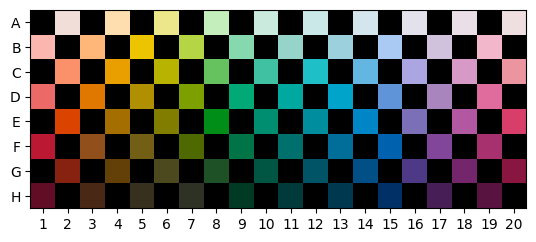

In [4]:
def plot_colors(color_column):
    fig, ax = plt.subplots()
    for idx, row in df.iterrows():
        ax.add_patch(plt.Rectangle((row['x'] - 0.5, row['y'] - 0.5), 1, 1, color=row[color_column], linewidth=0))

    ax.set_xlim(0.5, 20.5)
    ax.set_ylim(0.5, 8.5)
    ax.set_aspect('equal')
    ax.set_facecolor('black')
    ax.set_xticks(range(1, 21))
    ax.set_yticks(range(1, 9), ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])

plot_colors('tile_hex')

We can also use this function to plot the most common name in each language for each color chip.

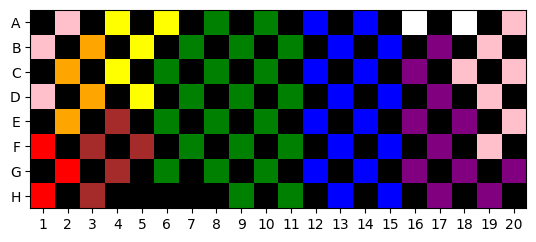

In [5]:
# Also try 'spanish_color' and 'tsimane_color'
plot_colors('english_color')

### Project Ideas:

- For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

- Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

- Is there a correlation between languages? Create scatter plots.
	- Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.

	- You might need to `merge` dataframes.


# Task
#1
Calculate the percentage of color chips named each color for English, Spanish, and Tsimane languages and display the results in three separate DataFrames.

In [6]:
english_color_counts = df['english_color'].value_counts()
total_chips = len(df)
df_english_percentage = (english_color_counts / total_chips * 100).reset_index()
df_english_percentage.columns = ['Color Name', 'Percentage']
print(df_english_percentage)

  Color Name  Percentage
0      green       27.50
1       blue       20.00
2     purple       13.75
3       pink       12.50
4     yellow        6.25
5      brown        6.25
6     orange        5.00
7        red        3.75
8      black        2.50
9      white        2.50


In [7]:
spanish_color_counts = df['spanish_color'].value_counts()
df_spanish_percentage = (spanish_color_counts / total_chips * 100).reset_index()
df_spanish_percentage.columns = ['Color Name', 'Percentage']
print(df_spanish_percentage)

   Color Name  Percentage
0       green       27.50
1   lightblue       13.75
2      purple       13.75
3        pink       10.00
4       white        7.50
5         red        5.00
6      orange        5.00
7      yellow        5.00
8       brown        5.00
9        blue        5.00
10      black        2.50


In [8]:
tsimane_color_counts = df['tsimane_color'].value_counts()
df_tsimane_color_percentage = (tsimane_color_counts / total_chips * 100).reset_index()
df_tsimane_color_percentage.columns = ['Color Name', 'Percentage']
print(df_tsimane_color_percentage)

  Color Name  Percentage
0      green       25.00
1       blue       15.00
2     yellow       13.75
3     purple       12.50
4      white       11.25
5        red       10.00
6      brown        8.75
7      black        3.75


#2

Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.


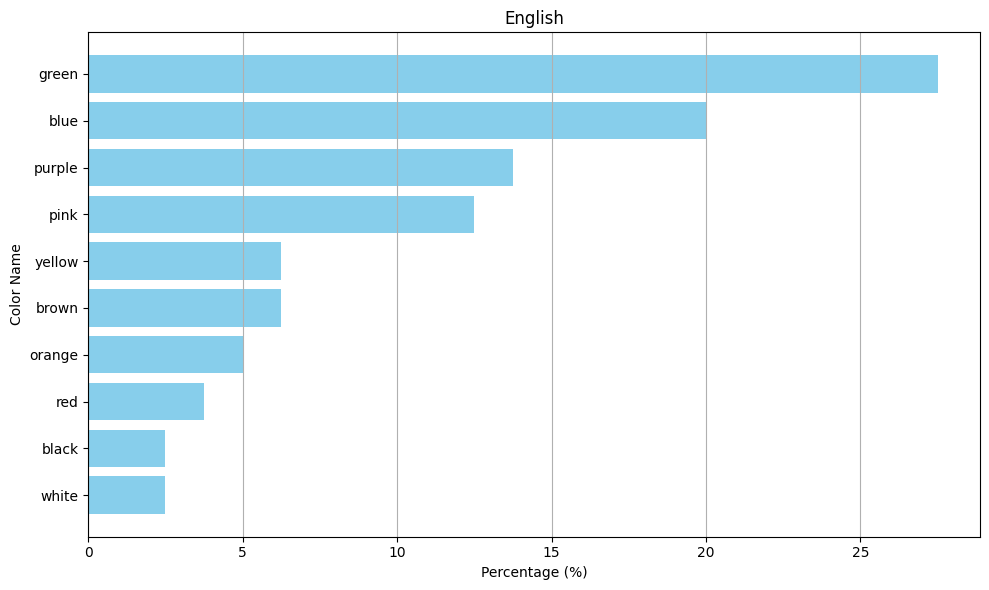

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(df_english_percentage['Color Name'], df_english_percentage['Percentage'], color='skyblue')
plt.xlabel('Percentage (%)')
plt.ylabel('Color Name')
plt.title('English')
plt.gca().invert_yaxis() # To display the highest percentage at the top
plt.grid(axis='x') # Add vertical grid lines
plt.tight_layout()
plt.show()

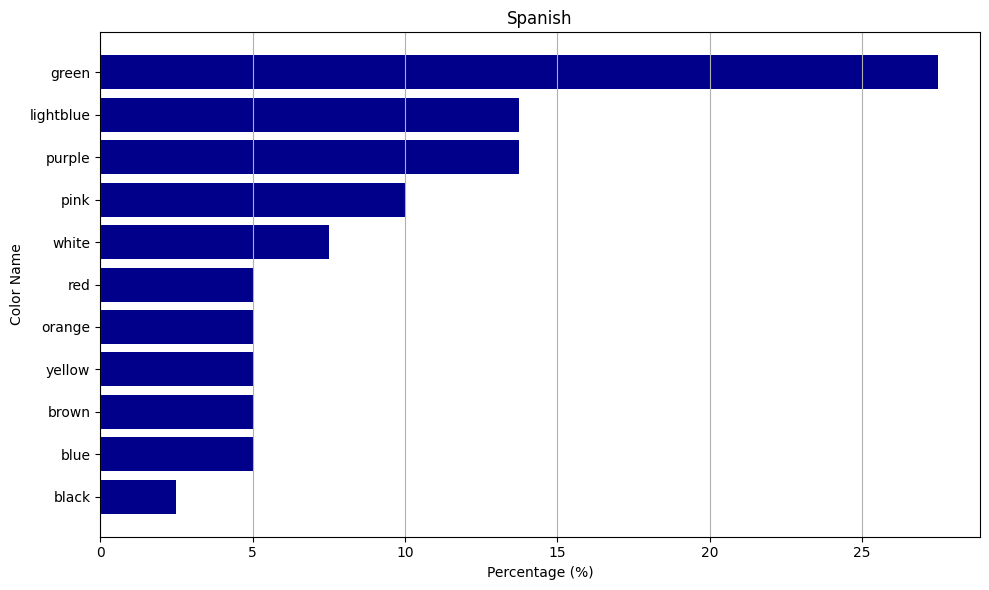

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(df_spanish_percentage['Color Name'], df_spanish_percentage['Percentage'], color='darkblue')
plt.xlabel('Percentage (%)')
plt.ylabel('Color Name')
plt.title('Spanish')
plt.gca().invert_yaxis() # To display the highest percentage at the top
plt.grid(axis='x') # Add vertical grid lines
plt.tight_layout()
plt.show()

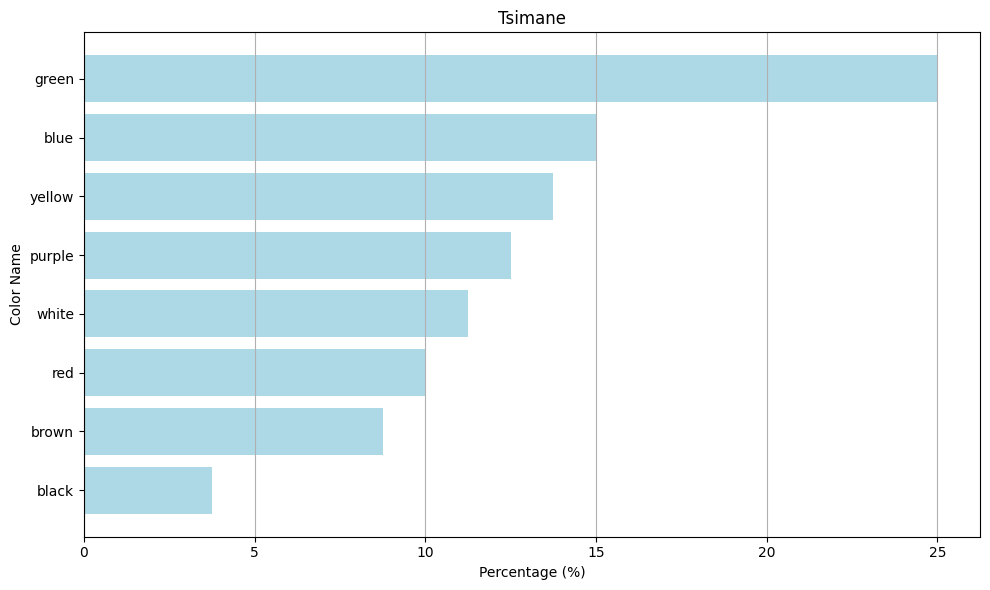

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(df_tsimane_color_percentage['Color Name'], df_tsimane_color_percentage['Percentage'], color='lightblue')
plt.xlabel('Percentage (%)')
plt.ylabel('Color Name')
plt.title('Tsimane')
plt.gca().invert_yaxis() # To display the highest percentage at the top
plt.grid(axis='x') # Add vertical grid lines
plt.tight_layout()
plt.show()

#3
Is there a correlation between languages? Create scatter plots.

Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.

You might need to merge dataframes.

In [28]:
df_all_languages = pd.merge(df_english_spanish, df_tsimane_color_percentage, on='Color Name', how='outer')
print(df_all_languages)

   Color Name  English_Percentage  Spanish_Percentage  Tsimane_Percentage
0       black                2.50                2.50                3.75
1        blue               20.00                5.00               15.00
2       brown                6.25                5.00                8.75
3       green               27.50               27.50               25.00
4   lightblue                 NaN               13.75                 NaN
5      orange                5.00                5.00                 NaN
6        pink               12.50               10.00                 NaN
7      purple               13.75               13.75               12.50
8         red                3.75                5.00               10.00
9       white                2.50                7.50               11.25
10     yellow                6.25                5.00               13.75


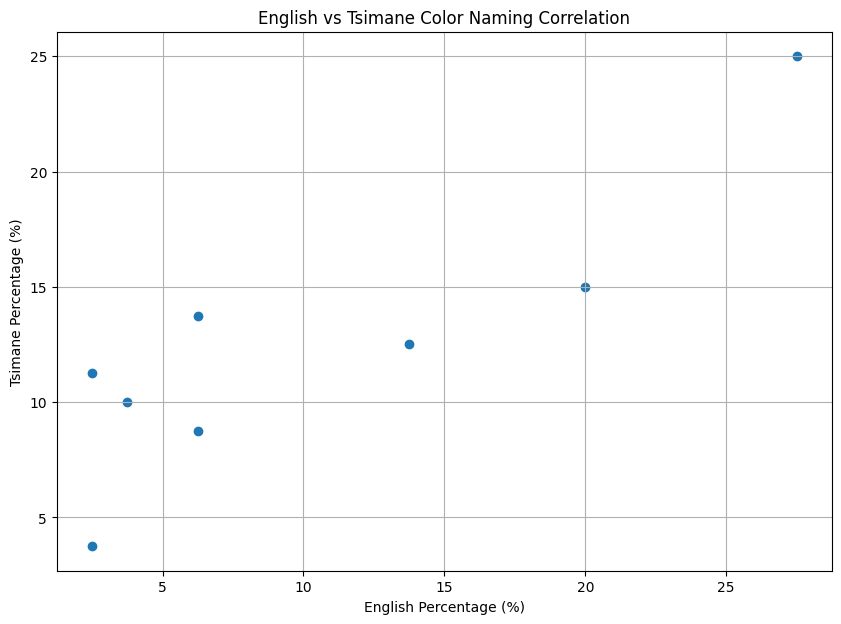

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(df_all_languages['English_Percentage'], df_all_languages['Tsimane_Percentage'])
plt.xlabel('English Percentage (%)')
plt.ylabel('Tsimane Percentage (%)')
plt.title('English vs Tsimane Color Naming Correlation')
plt.grid(True)
plt.show()

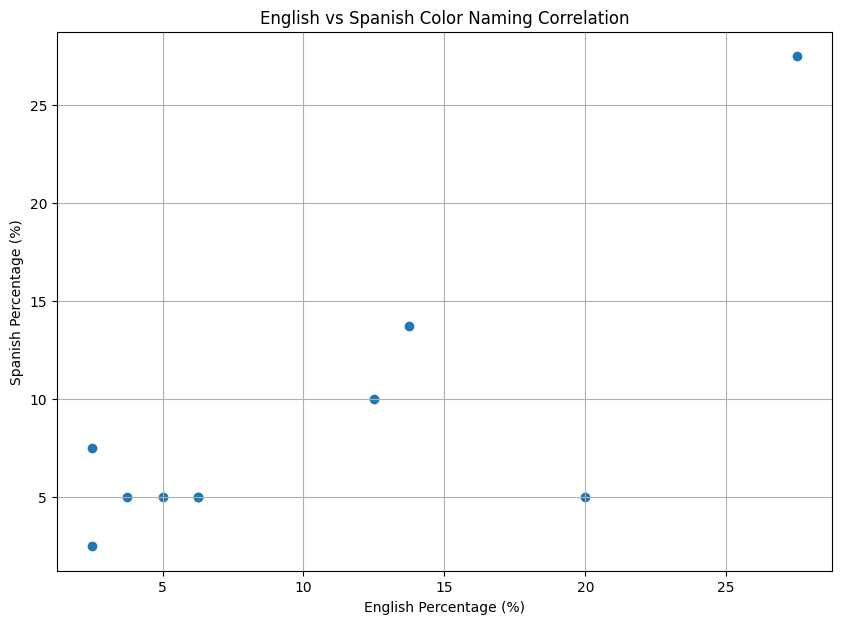

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(df_all_languages['English_Percentage'], df_all_languages['Spanish_Percentage'])
plt.xlabel('English Percentage (%)')
plt.ylabel('Spanish Percentage (%)')
plt.title('English vs Spanish Color Naming Correlation')
plt.grid(True)
plt.show()

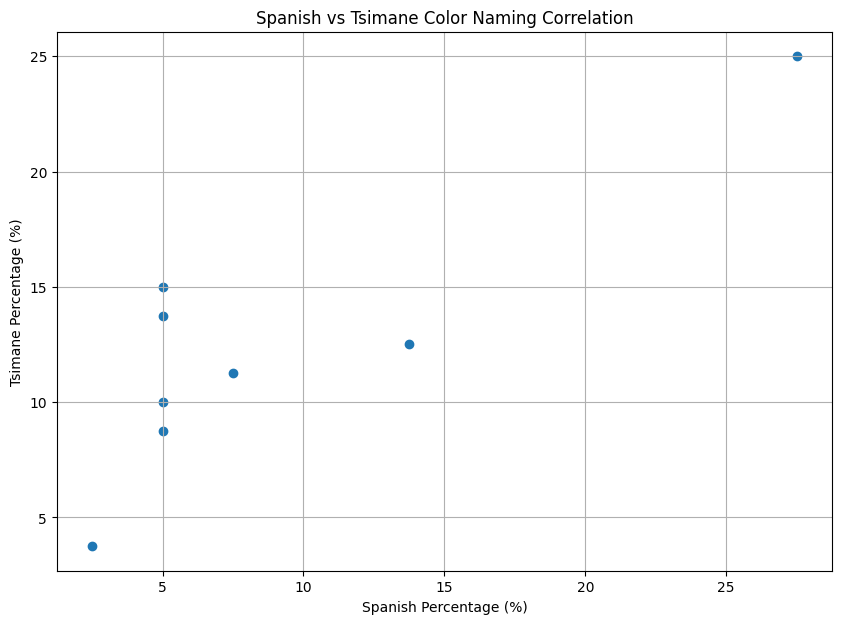

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(df_all_languages['Spanish_Percentage'], df_all_languages['Tsimane_Percentage'])
plt.xlabel('Spanish Percentage (%)')
plt.ylabel('Tsimane Percentage (%)')
plt.title('Spanish vs Tsimane Color Naming Correlation')
plt.grid(True)
plt.show()

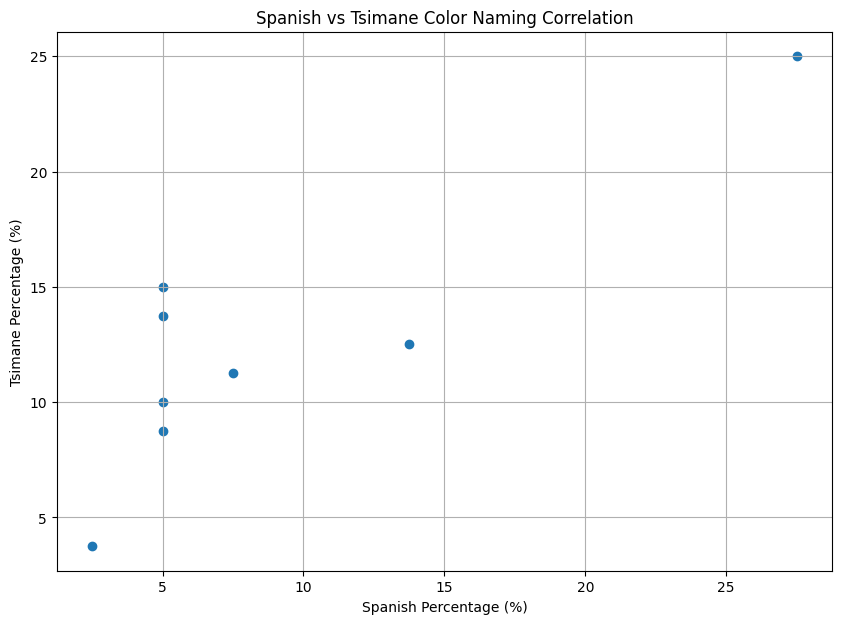

In [33]:
plt.figure(figsize=(10, 7))
plt.scatter(df_all_languages['Spanish_Percentage'], df_all_languages['Tsimane_Percentage'])
plt.xlabel('Spanish Percentage (%)')
plt.ylabel('Tsimane Percentage (%)')
plt.title('Spanish vs Tsimane Color Naming Correlation')
plt.grid(True)
plt.show()